# Importando as Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

# Importando as Notas

In [ ]:
notas = pd.read_csv('/ratings.csv')
notas.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [ ]:
notas.columns = ['usuarioId','filmeId','nota','momento']
notas.head(3)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


## Analisando as Notas em Geral

### Describe
  Informa como os dados estão distribuidos na base de dados e informações básicas de estatistica bem como:

  - contagem 
  -mediana
  -media
  -quartis
  -min
  -max
  

In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

##Plotagem

No momento de apresentar os dados em forma de gráfico. Temos que contar uma historia, de forma que fique facil para o entendimento do publico.


### Histograma 
 é uma boa forma de mostrar como os dados estão distribuidos pela base de dados.


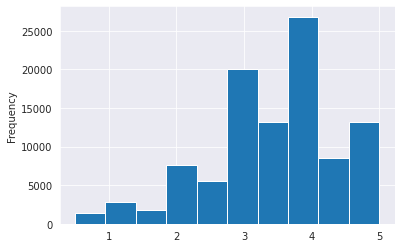

In [ ]:
notas.nota.plot(kind='hist');

## Analise Exploratoria
Neste gráfico, já é possivel ter uma ideia de como os dados estão distribuidos.

Por exemplo:
- Não houveram notas com valor 0
- A Nota 4 apareceu mais vezes.
- A Nota 3 foi mais votada que a Nota 5

## Boxplot

é uma boa forma de apresentar a distribuição dos dados em forma de gráfico.




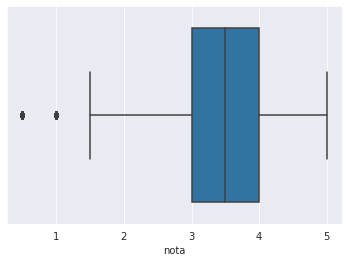

In [ ]:
sns.boxplot(data = notas,x='nota');

### Como Analisar BoxPlot
 Boxplot é dividido em quartis.
 - 1° Divisão - 25% dos dados distribuidos
 - 2° Divisão - 50% dos dados distribuidos
 - 3° Divisão - 75% dos dados distribuidos
 - 4° Divisão - 100% dos dados distribuidos

 Pontos fora desta distribuição são valores **Outliers**.

## Analisando

 - Na primeira divisão, 25% está com uma distribuição mais ampla entre 1,5 e 3.
 
 - Este grafico mostra que 50% das avaliações estão concentradas entre as Notas 3 e 4
 
 


## Analise dos Filmes


### Fazendo uso da querry

In [ ]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [ ]:
media_nota_filme = notas.groupby('filmeId').mean().nota
media_nota_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


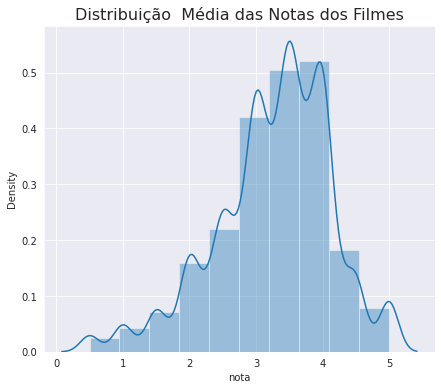

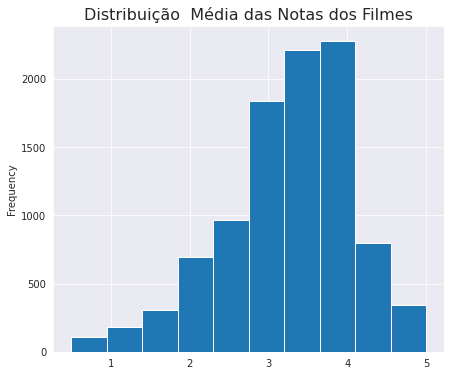

In [ ]:
plt.figure(figsize=(7,6))
sns.distplot(media_nota_filme,bins=10)
plt.title('Distribuição  Média das Notas dos Filmes',size=16);
plt.show();


plt.figure(figsize=(7,6))
media_nota_filme.plot.hist()
plt.title('Distribuição  Média das Notas dos Filmes',size=16);


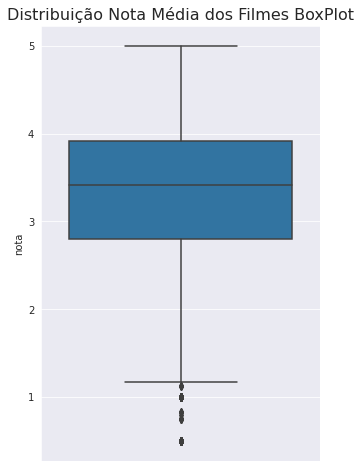

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(y=media_nota_filme)
plt.title('Distribuição Nota Média dos Filmes BoxPlot',size=16);

# Importando Filmes

In [ ]:
filmes = pd.read_csv('/movies.csv')
filmes.columns=['filmeId','titulo','genero']
filmes

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


# Unindo as duas tabelas

In [ ]:
print('Tamanho Base de Dados -  Nota Filme: ',media_nota_filme.shape)
print('Tamanho Base de Dados -  Filme Genero: ',filmes.shape)



Tamanho Base de Dados -  Nota Filme:  (9724,)
Tamanho Base de Dados -  Filme Genero:  (9742, 3)


In [ ]:
nota_filme = pd.merge(filmes,media_nota_filme,on='filmeId')
nota_filme.head()


,filmeId,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Importando Base de Dados TMDB


In [ ]:
tmdb = pd.read_csv('/tmdb_5000_movies.csv')
tmdb.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


## Analisando os idiomas originais dos filmes

In [ ]:
## Verificando quais idiomas a base de dados possui 

tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
contagem_lingua = tmdb.original_language.value_counts().reset_index()

contagem_lingua.columns = ['original_language','total']

contagem_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


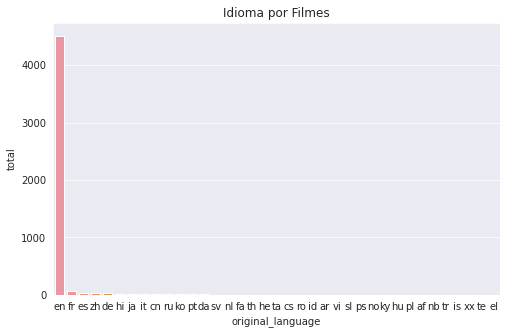

In [ ]:
plt.rcParams["figure.figsize"]= (8,5)
sns.barplot(x='original_language',y='total',data=contagem_lingua);
plt.title('Idioma por Filmes')
plt.show()

## Separando os idiomas para estudo de comparação


In [ ]:
total_idioma = tmdb.original_language.value_counts()
total_ingles = total_idioma.loc['en']
total_geral = total_idioma.sum()
total_resto = total_geral - total_ingles


print(total_ingles, total_resto)

4505 298


In [ ]:
dados = {
    'lingua' : ['inglês','outros'],
    'total' : [total_ingles,total_resto]
} 

dados = pd.DataFrame(dados)

,lingua,total
0,inglês,4505
1,outros,298


In [ ]:
idioma_total_outros = tmdb.query("original_language!='en'").original_language.value_counts().reset_index()
idioma_total_outros.columns=['idioma','total']

## Gráficos

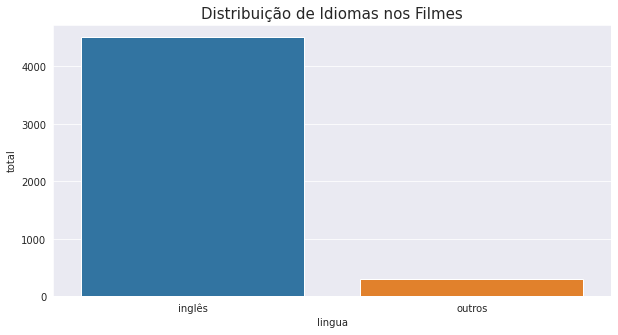

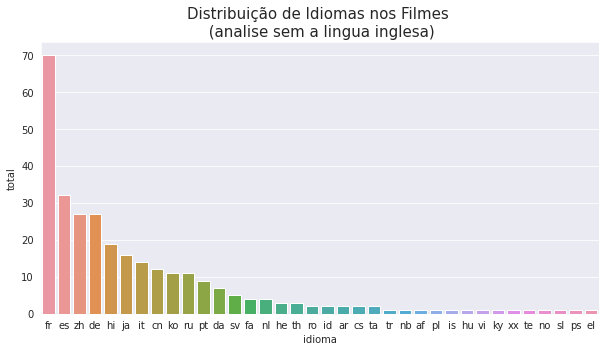

In [ ]:
plt.rcParams['figure.figsize']=(10,5)

sns.barplot(x='lingua',y='total', data = dados)
plt.title('Distribuição de Idiomas nos Filmes',size=15)
plt.show()


plt.title('Distribuição de Idiomas nos Filmes \n (analise sem a lingua inglesa)',size=15)
sns.barplot(x='idioma',y='total',data=idioma_total_outros)
plt.show()